In [90]:
import pandas as pd
import six

rbfox2 = pd.read_table(six.StringIO('''Pos	A	C	G	U
1	0.042553191489362	0	0	0.95744680851064
2	0	0	1	0
3	0	1	0	0
4	1	0	0	0
5	0	0	0	1
6	0	0	1	0'''), index_col=0).T

mbnl1 = pd.read_table(six.StringIO('''Pos	A	C	G	U
1	0	0.42009132420091	0	0.57990867579909
2	0	0.0045662100456621	0.99543378995434	0
3	0	0.99543378995434	0.0045662100456621	0
4	0	0.19634703196347	0	0.80365296803653'''), index_col=0).T

fus = pd.read_table(six.StringIO('''Pos	A	C	G	U
1	0	0	1	0
2	0	0	1	0
3	0	0	0	1
4	0	0	1	0'''), index_col=0).T

rbfox2_5mer = pd.read_table(six.StringIO('''Pos	A	C	G	U
1	0	0	1	0
2	0	1	0	0
3	1	0	0	0
4	0	0.125	0	0.875
5	0	0	1	0'''), index_col=0).T

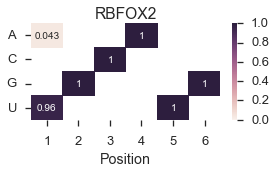

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(style='ticks', context='talk')


fig, ax = plt.subplots(figsize=(4, 2.5))
sns.heatmap(rbfox2, annot=True, mask=rbfox2 == 0)
ax.set_yticklabels(rbfox2.index[::-1], rotation=0)
ax.set(title='RBFOX2', xlabel='Position')
fig.tight_layout()
fig.savefig('/home/obotvinnik/Dropbox/figures2/singlecell_pnm/rbfox2_motif_heatmap.pdf')

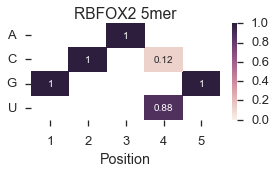

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(style='ticks', context='talk')


fig, ax = plt.subplots(figsize=(4, 2.5))
sns.heatmap(rbfox2_5mer, annot=True, mask=rbfox2_5mer == 0)
ax.set_yticklabels(rbfox2_5mer.index[::-1], rotation=0)
ax.set(title='RBFOX2 5mer', xlabel='Position')
fig.tight_layout()
fig.savefig('/home/obotvinnik/Dropbox/figures2/singlecell_pnm/rbfox2_5mer_motif_heatmap.pdf')

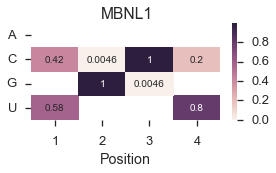

In [19]:
fig, ax = plt.subplots(figsize=(4, 2.5))
sns.heatmap(mbnl1, annot=True, mask=mbnl1 == 0)
ax.set_yticklabels(mbnl1.index[::-1], rotation=0)
ax.set(title='MBNL1', xlabel='Position')
fig.tight_layout()
fig.savefig('/home/obotvinnik/Dropbox/figures2/singlecell_pnm/mbnl1_motif_heatmap.pdf')

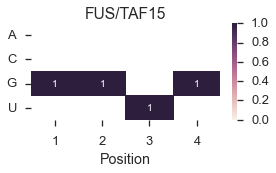

In [21]:
fig, ax = plt.subplots(figsize=(4, 2.5))
sns.heatmap(fus, annot=True, mask=fus == 0)
ax.set_yticklabels(fus.index[::-1], rotation=0)
ax.set(title='FUS/TAF15', xlabel='Position')
fig.tight_layout()
fig.savefig('/home/obotvinnik/Dropbox/figures2/singlecell_pnm/fus_taf15_motif_heatmap.pdf')

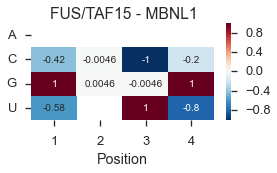

In [22]:
fus_minus_mbnl1 = fus - mbnl1

fig, ax = plt.subplots(figsize=(4, 2.5))
sns.heatmap(fus_minus_mbnl1, annot=True, mask=fus_minus_mbnl1 == 0)
ax.set_yticklabels(fus_minus_mbnl1.index[::-1], rotation=0)
ax.set(title='FUS/TAF15 - MBNL1', xlabel='Position')
fig.tight_layout()
fig.savefig('/home/obotvinnik/Dropbox/figures2/singlecell_pnm/fus_taf15_minus_mbnl1_motif_heatmap.pdf')

In [35]:
import six
import pandas as pd

RNA = 'ACGU'
DNA = 'ACGT'

import itertools

kmer_lengths = 4, 5, 6

# print sum(4**k for k in kmer_lengths)

# kmers = list(itertools.chain(
#     *[map(lambda x: ''.join(x), itertools.product(RNA, repeat=k)) for k in kmer_lengths]))
four_mers = map(lambda x: ''.join(x), itertools.product(RNA, repeat=4))
print len(four_mers)
four_mers_list = map(list, four_mers)
four_mers[:10]


256


['AAAA',
 'AAAC',
 'AAAG',
 'AAAU',
 'AACA',
 'AACC',
 'AACG',
 'AACU',
 'AAGA',
 'AAGC']

In [93]:
rbfox2_pwm = rbfox2.copy().T
rbfox2_pwm.index = range(rbfox2_pwm.shape[0])

rbfox2_5mer_pwm = rbfox2_5mer.copy().T
rbfox2_5mer_pwm.index = range(rbfox2_5mer_pwm.shape[0])


mbnl1_pwm = mbnl1.copy().T
mbnl1_pwm.index = range(mbnl1_pwm.shape[0])

fus_pwm = fus.copy().T
fus_pwm.index = range(fus_pwm.shape[0])
fus_pwm

,A,C,G,U
0,0,0,1,0
1,0,0,1,0
2,0,0,0,1
3,0,0,1,0


In [94]:
pwms = {'RBFOX2': rbfox2_pwm, 'MBNL1': mbnl1_pwm, 'FUS': fus_pwm, "RBFOX2 (length 5)": rbfox2_5mer_pwm}
for name, pwm in pwms.items():
    pwm = pwm + 0.001
    pwm = pwm.divide(pwm.sum(axis=1), axis=0)
    pwms[name] = pwm

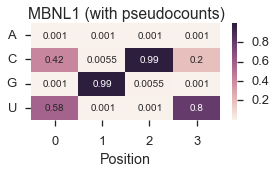

In [86]:
fig, ax = plt.subplots(figsize=(4, 2.5))
sns.heatmap(pwms['MBNL1'].T, annot=True)
ax.set_yticklabels(fus.index[::-1], rotation=0)
ax.set(title='MBNL1 (with pseudocounts)', xlabel='Position')
fig.tight_layout()
fig.savefig('/home/obotvinnik/Dropbox/figures2/singlecell_pnm/mbnl1_motif_pseudocount_heatmap.pdf')

In [67]:
import numpy as np


def score_kmers(pwm, kmers):
    """Generator to score kmers given a position-weight matrix
    
    Parameters
    ----------
    pwm : pandas.DataFrame
        A (length, 4) dataframe of the weight of each position's probability 
        of each nucleotide
    kmers : list of list
        A list of kmers strings as lists, e.g. [['G', 'G', 'G', 'G', 'G', 'G']]
    
    """
    motif_length = pwm.shape[0]
    for kmer in kmers:
        k = len(kmer)
        
        divisor = min(k, motif_length)
        if k == motif_length:
            score = np.sum(pwm.lookup(range(motif_length), kmer))/divisor
        elif k > motif_length:
            starts = range(k - motif_length + 1)
            n_positions = len(starts)
            score = sum(np.sum(pwm.lookup(range(motif_length), 
                                                kmer[start:(start+motif_length)]))/divisor
                        for start in starts)/n_positions
        else:
            # k < motif_length
            starts = range(motif_length - k + 1)
            n_positions = len(starts)
            score = sum(np.sum(pwm.lookup(range(start, start+k), kmer))/divisor
                        for start in starts)/n_positions
        yield score


In [71]:
mbnl1_4mer_scores = pd.Series(score_kmers(pwms['MBNL1'], four_mers_list), index=four_mers, name='MBNL1')
fus_4mer_scores = pd.Series(score_kmers(pwms['FUS'], four_mers_list), index=four_mers, name='FUS')

In [72]:
from scipy.stats import spearmanr

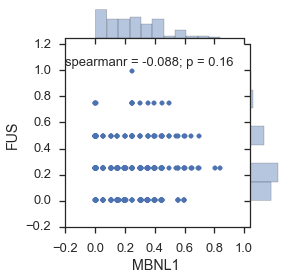

In [83]:
g = sns.jointplot(mbnl1_4mer_scores, fus_4mer_scores, size=4, stat_func=spearmanr)
g.savefig('/home/obotvinnik/Dropbox/figures2/singlecell_pnm/mbnl_vs_fus_motif_kmers.pdf')

In [74]:
kmer_lengths = 4, 5, 6

print sum(4**k for k in kmer_lengths)

kmers = list(itertools.chain(
    *[map(lambda x: ''.join(x), itertools.product(RNA, repeat=k)) for k in kmer_lengths]))
print len(kmers)
kmers_list = map(list, kmers)
kmers[:10]

5376
5376


['AAAA',
 'AAAC',
 'AAAG',
 'AAAU',
 'AACA',
 'AACC',
 'AACG',
 'AACU',
 'AAGA',
 'AAGC']

In [95]:
kmer_scores = pd.DataFrame(dict((rbp, list(score_kmers(pwm, kmers_list))) for rbp, pwm in pwms.items()), index=kmers)

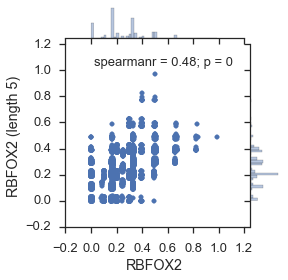

In [98]:
g = sns.jointplot('RBFOX2', 'RBFOX2 (length 5)', data=kmer_scores, size=4, stat_func=spearmanr)
g.savefig('/home/obotvinnik/Dropbox/figures2/singlecell_pnm/rbfox2_vs_rbfox2_motif_kmers.pdf')

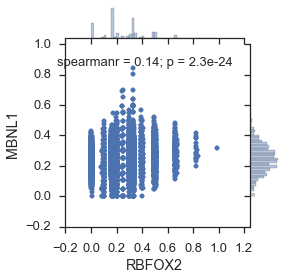

In [81]:
g = sns.jointplot('RBFOX2', 'MBNL1', data=kmer_scores, size=4, stat_func=spearmanr)
g.savefig('/home/obotvinnik/Dropbox/figures2/singlecell_pnm/rbfox2_vs_mbnl1_motif_kmers.pdf')

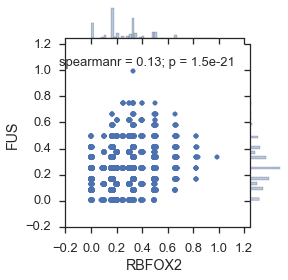

In [82]:
g = sns.jointplot('RBFOX2', 'FUS', data=kmer_scores, size=4, stat_func=spearmanr)
g.savefig('/home/obotvinnik/Dropbox/figures2/singlecell_pnm/rbfox2_vs_fus_motif_kmers.pdf')

In [89]:
kmer_scores.loc[['AAAA', 'CGCC', 'CGCU', 'UGCC', 'UGCU', 'UUUU'], ]

,FUS,MBNL1,RBFOX2
AAAA,0.001988,0.000996,0.253532
CGCC,0.250000,0.650226,0.250000
CGCU,0.250000,0.801447,0.333001
UGCC,0.250000,0.690021,0.246468
UGCU,0.250000,0.841242,0.329469
UUUU,0.250000,0.345508,0.246468
